<a href="https://colab.research.google.com/github/SUPERREALCODER/Quantum-Challenge/blob/main/1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# International Faculty Development Program on _“Quantum Artificial Intelligence”_

## Basic Tools - qiskit

#### Contents

1. Initial setup.
2. Package Installation.
3. Create QuantumCircuit.
4. Run Circuit in (a) ideal simulator, (b) real IBMQ backend, and (c) Fake backend (noisy).
5. Visualize results.

__Required: python__

Install Anaconda or 'jupyter notebook' (I'll use notebook).

To install notebook, in terminal or command promt run command: `pip install notebook`.<br>
After installation, launch the notebook using command: `jupyter notebook`.

#### Install qiskit

In [ ]:
!pip install qiskit
!pip install qiskit_aer  # For local simulator
!pip install qiskit_ibm_runtime  # For cloud simulator and IBM quantum backand

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 26.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 7.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requir

In [ ]:
!pip install pylatexenc

#### Quantum Circuit

- `Quantum circuit is not a circuit`. It is the visual representation of the `time evaluation of qubits` from left to right.
- Quantum circuit consists of `Quantum Register`, `Classical Register` and `Quantum Operation` (including measurement).

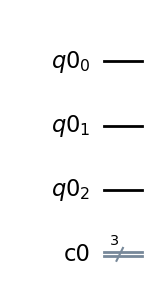

In [ ]:
# Import required packages
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

# Build your first quantum circuit
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr, cr)
qc.draw('mpl')

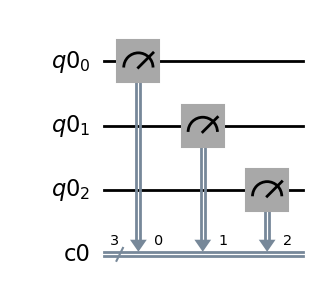

In [ ]:
# Add measurement
qc.measure([0, 1, 2], [0, 1, 2])
qc.draw('mpl')

Qiskit has lots of quantum simulators, `AerSimulator`, `QasmSimulator` etc. It also provides cloud access of few real quantum computers through IBMid. Anyone create the id from https://quantum.ibm.com/.

Other than these, qiskit also has some `FakeBackends` that uses similar noise structure corresponding to their actual backends.

In [ ]:
# Select simulator
from qiskit_aer import AerSimulator

simulator = AerSimulator()

# Run your circuit and get counts
result = simulator.run(qc).result()
count = result.get_counts()
print(count)

{'000': 1024}


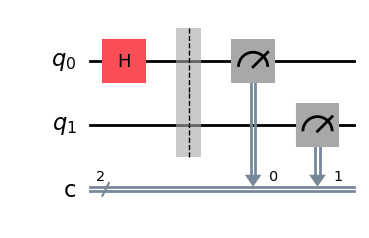

In [ ]:
# Create another Circuit
circ = QuantumCircuit(2, 2)
circ.h(0)
circ.barrier()
circ.measure([0, 1], [0, 1])
circ.draw('mpl')

To access IBM's real quantum computer one need `IBM TOKEN` generated for their IBMid. One can save the account information in disk to avoid account verification every time.

In [ ]:
!pip install qiskit_ibm_runtime

In [ ]:
import qiskit_ibm_runtime
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as sampler

# # Access and save your account
QRS = QiskitRuntimeService(channel = 'ibm_quantum', token = "IBM TOKEN")
QRS.save_account(channel="ibm_quantum", token = "IBM TOKEN", set_as_default = True)

In [ ]:
# Access saved account
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as sampler

QRS = QiskitRuntimeService()
QRS.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyoto')>,
 <IBMBackend('ibm_osaka')>,
 <IBMBackend('ibm_sherbrooke')>]

- Not all quantum operations are available in all backends.
- However, any quantum operation can be expressed as combination of available operations.
- By transpiling a quantum circuit, an equivalent circuit is prepared for which all operations are available in the corresponding backend.
- all circuits needs to be transpiled before running them to avoid any unavailable operation.

<IBMBackend('ibm_osaka')>


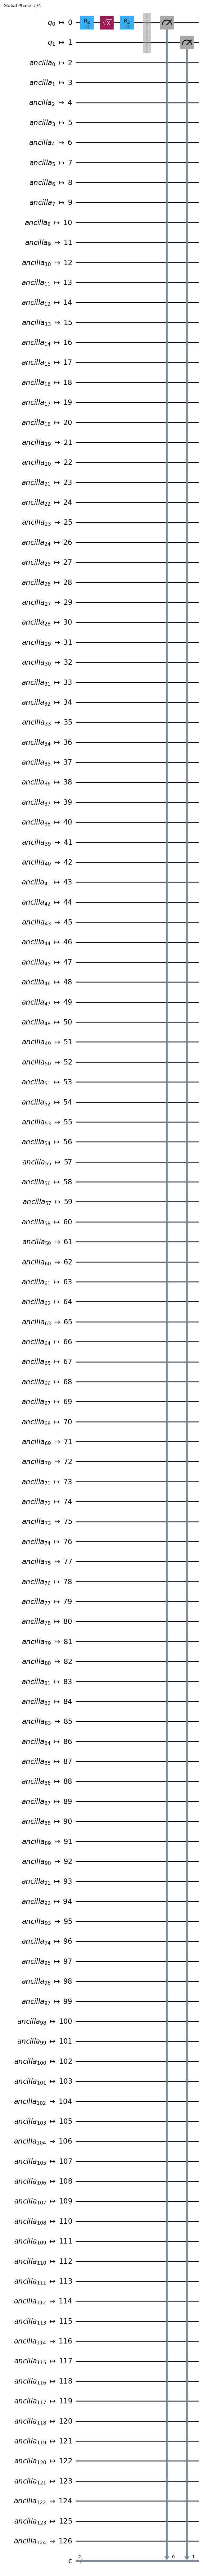

In [ ]:
# Get backend which is least busy
backend = QRS.least_busy(operational = True)
print(backend)

# Transpile the circuit
from qiskit import transpile
circ = transpile(circ, backend)
circ.draw('mpl')

In [ ]:
# Submit job and get job_id
samp = sampler(backend)
job = samp.run([circ])
print(f"job id: {job.job_id()}")

job id: cswnc20sgar0008c6mmg


- Job will take some time to complete depending on backend's availability and remaining queue.
- One can retrieve the job later, afetr its completion.

{'00': 2085, '01': 1994, '11': 8, '10': 9}


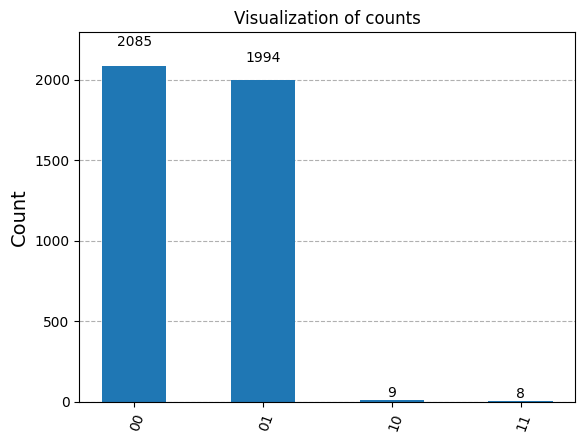

In [ ]:
# Get result
job = QRS.job('cswnc20sgar0008c6mmg')
job_result = job.result()

# To get counts
count = job_result[0].data.c.get_counts()  # Here c is the name of the ClassicalRegister
print(count)

# Visualize with histogram
from qiskit.visualization import plot_histogram

plot_histogram(count, title='Visualization of counts')

In [ ]:
# Import fake backend
from qiskit_ibm_runtime.fake_provider import FakeOsaka

backend = FakeOsaka()

# Run your circuit and get counts
result = backend.run(circ, shots = 4096).result()
count = result.get_counts()
print(count)

{'11': 16, '10': 14, '00': 2025, '01': 2041}


One can visualize the results in different ways including `histogram`, `probability distribution`, `bloch sphere`, `qsphere`, etc.

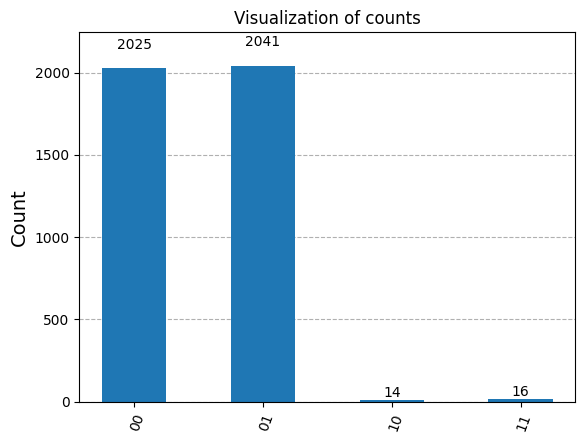

In [ ]:
# Visualize with histogram
from qiskit.visualization import plot_histogram, plot_distribution, plot_bloch_vector, plot_bloch_multivector, plot_state_city, plot_state_qsphere

plot_histogram(count, title='Visualization of counts')

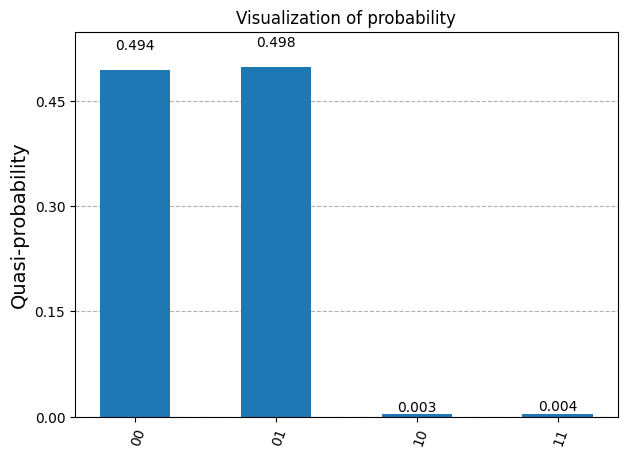

In [ ]:
plot_distribution(count, title='Visualization of probability')

For a statevector $\cos(\theta/2)|0\rangle+e^{i\phi}\sin(\theta/2)|1\rangle$, the parameters $\theta,\phi$ represents its spherical coordinate as $(1, \theta, \phi)$. And corresponding cartesian coordinate will be $(\sin\theta\cos\phi, \sin\theta\sin\phi, \cos\theta)$.

Therefore, the coordinate of the state $|+\rangle=\frac{1}{\sqrt{2}}[1, 1]$ is given by $(1, \pi/2, 0)$ or equivallently, $(1, 0, 0)$.

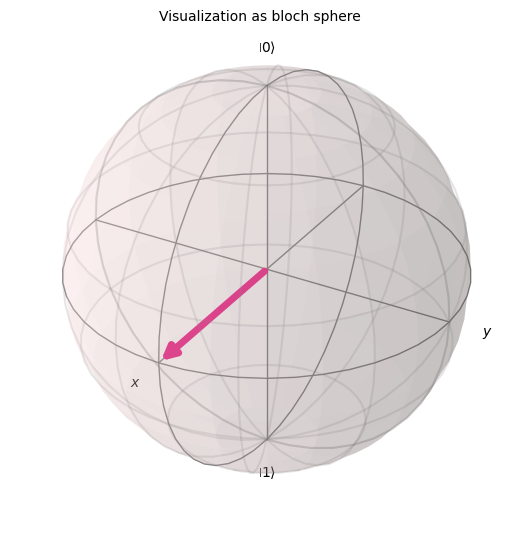

In [ ]:
# For bloch vector plot one has to provide coordinate of the vector corresponding to the state
vec = [1, 0, 0]
plot_bloch_vector(vec, title='Visualization as bloch sphere')

For other representations, one has to provide statevector.

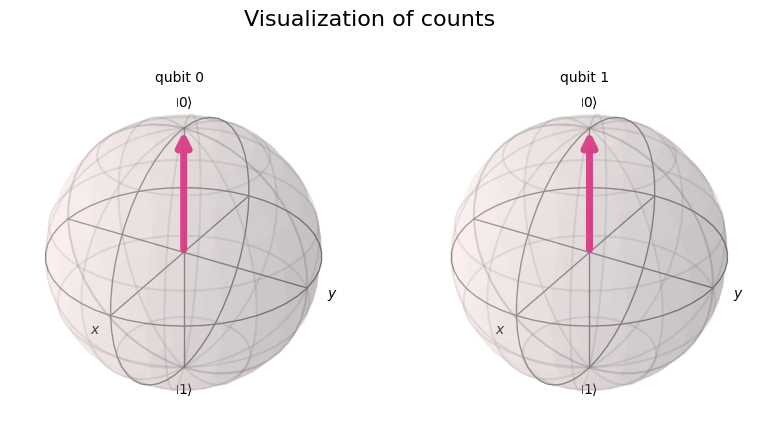

In [ ]:
# Bloch sphere for multiple qubit in product state
vec = [1, 0, 0, 0]
plot_bloch_multivector(vec, title='Visualization of counts')

Bloch sphere would not work for correlated state, as in that case each qubits are in mixed state while considered seperately.

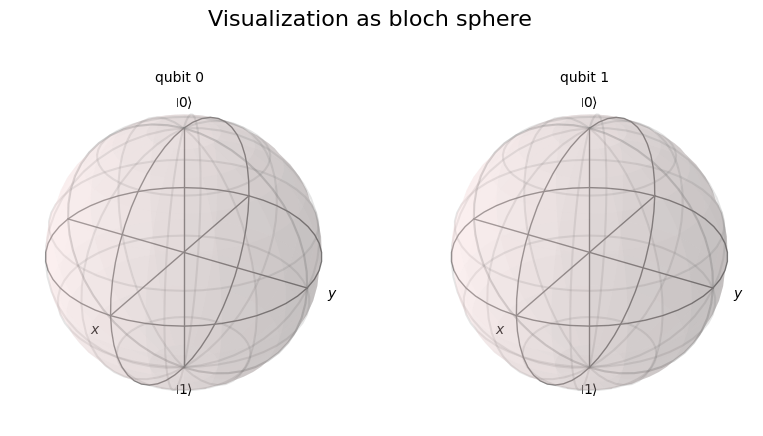

In [ ]:
# Single bloch sphere for multiple qubits
from math import sqrt
vec = [1/sqrt(2), 0, 0, -1/sqrt(2)]
plot_bloch_multivector(vec, title='Visualization as bloch sphere')

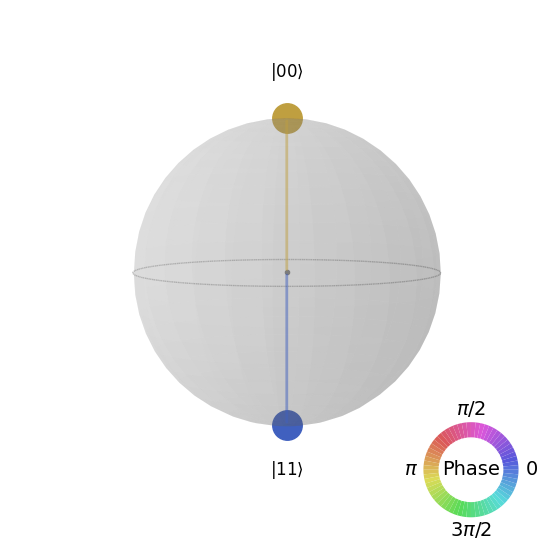

In [ ]:
plot_state_qsphere(vec)

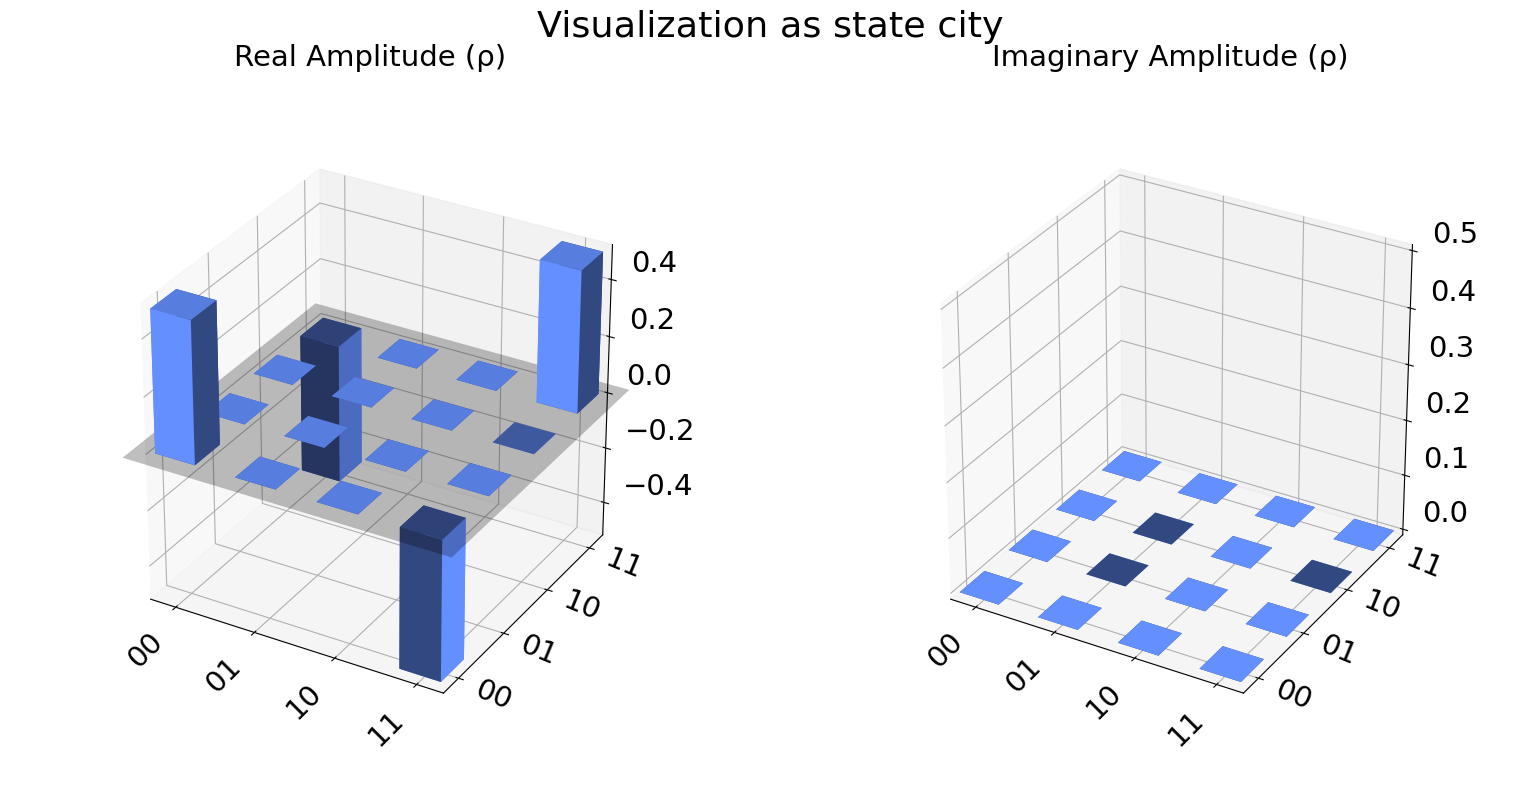

In [ ]:
plot_state_city(vec, title='Visualization as state city')

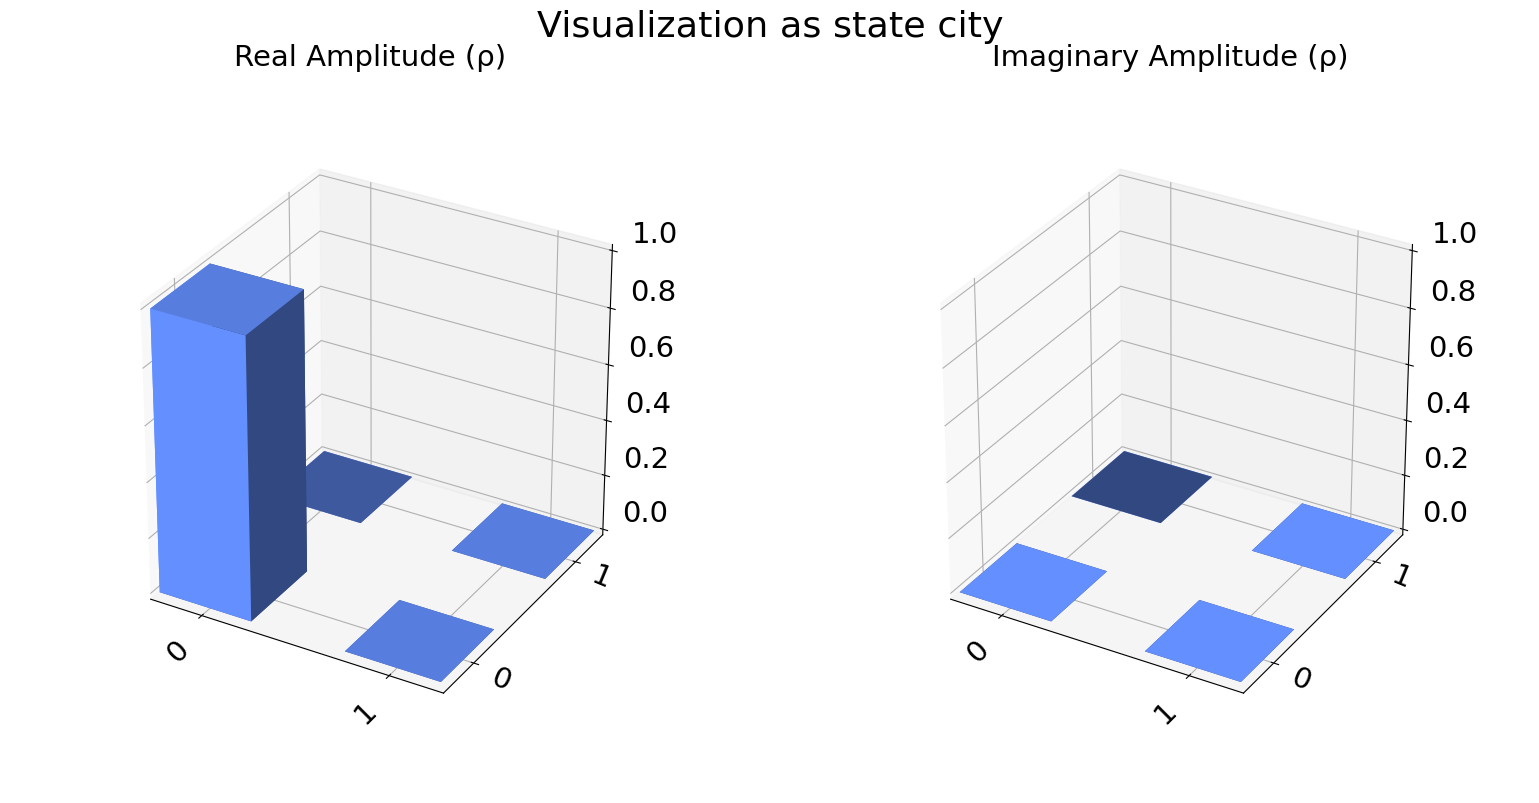

In [ ]:
# single qubit
vec = [1, 0]
plot_state_city(vec, title='Visualization as state city')

### Reference

1. Qiskit textbook: https://github.com/Qiskit/textbook/tree/main.
2. IBM Quantum Learning: https://learning.quantum.ibm.com/.
3. M. A. Nielsen, I.L. Chuang, Quantum Computation and Quantum Information.